Introduction
In this activity, you will use simple linear regression to explore the relationship between two continuous variables. To accomplish this, you will perform a complete simple linear regression analysis, which includes creating and fitting a model, checking model assumptions, analyzing model performance, interpreting model coefficients, and communicating results to stakeholders.

For this activity, you are part of an analytics team that provides insights about marketing and sales. You have been assigned to a project that focuses on the use of influencer marketing, and you would like to explore the relationship between marketing promotional budgets and sales. The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, leaders in your company will make decisions about where to focus future marketing efforts, so it is critical to have a clear understanding of the relationship between the different types of marketing and the revenue they generate.

This activity will develop your knowledge of linear regression and your skills evaluating regression results which will help prepare you for modeling to provide business recommendations in the future.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
file_path = "../data/raw/marketing_and_sales_data_evaluate_lr.csv"
data = pd.read_csv(file_path)

In [4]:
data.head(10)

,TV,Radio,Social_Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181
5,29.0,9.614382,1.027163,105.889148
6,55.0,24.893811,4.273602,198.679825
7,31.0,17.355042,2.289855,108.733932
8,76.0,24.648898,7.130116,270.189400
9,13.0,0.431128,2.229423,48.280582


In [5]:
# Display the shape of the data as a tuple (rows, columns).

### YOUR CODE HERE ### 
data.shape

(4572, 4)

In [6]:
data[['TV', 'Radio', 'Social_Media']].describe()

,TV,Radio,Social_Media
count,4562.000000,4568.000000,4566.000000
mean,54.066857,18.160356,3.323956
std,26.125054,9.676958,2.212670
min,10.000000,0.000684,0.000031
25%,32.000000,10.525957,1.527849
50%,53.000000,17.859513,3.055565
75%,77.000000,25.649730,4.807558
max,100.000000,48.871161,13.981662


In [7]:
# Calculate the average missing rate in the sales column.

### YOUR CODE HERE ###
missing_sales = data['Sales'].isna().mean()

# Convert the missing_sales from a decimal to a percentage and round to 2 decimal place.
### YOUR CODE HERE ###
missing_sales = round(missing_sales * 100, 2)

# Display the results (missing_sales must be converted to a string to be concatenated in the print statement).

### YOUR CODE HERE ###
print("Missing rate in Sales column is " + str(missing_sales) + '%')

Missing rate in Sales column is 0.13%


In [8]:
data_clean = data[data['Sales'].notna()]

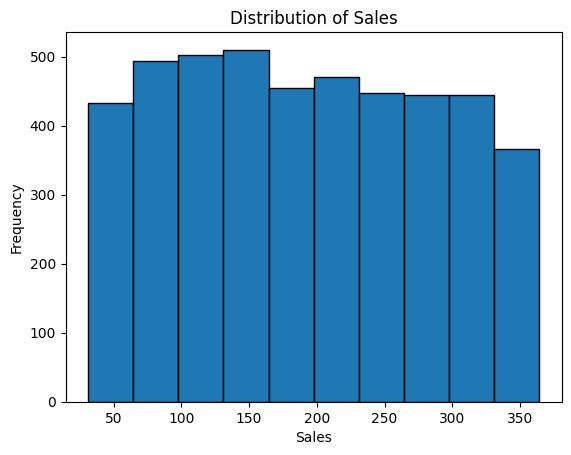

In [9]:
# Create a histogram of the Sales.

### YOUR CODE HERE ### 
plt.hist(data_clean['Sales'], bins=10, edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

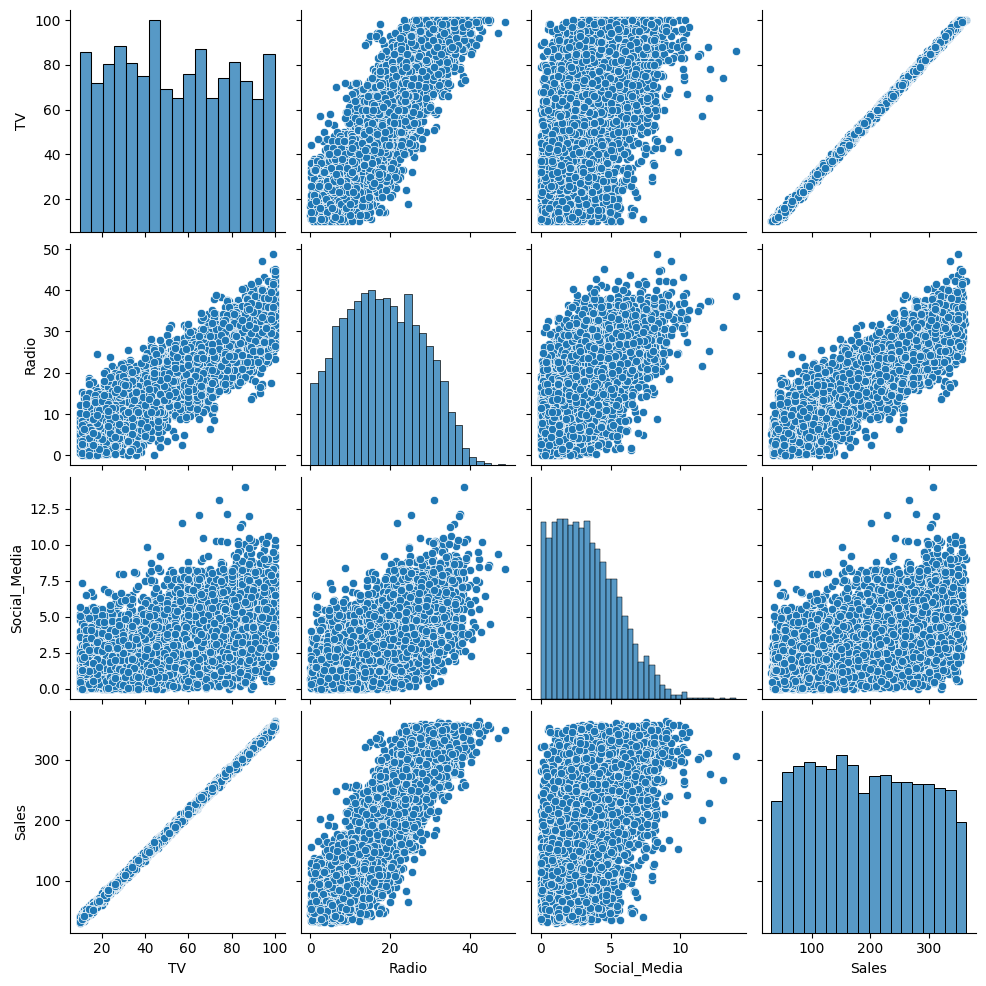

In [10]:
sns.pairplot(data_clean[['TV', 'Radio', 'Social_Media', 'Sales']])

In [11]:
# Define the OLS formula.

### YOUR CODE HERE ### 
formula = 'Sales ~ TV'
# Create an OLS model.
model = ols(formula, data=data_clean)
 
# Fit the model.
results = model.fit()
 
# Save the results summary.
summery = results.summary()
### YOUR CODE HERE ### 

# Display the model results.

print(summery)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Wed, 16 Apr 2025   Prob (F-statistic):               0.00
Time:                        21:28:43   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.2

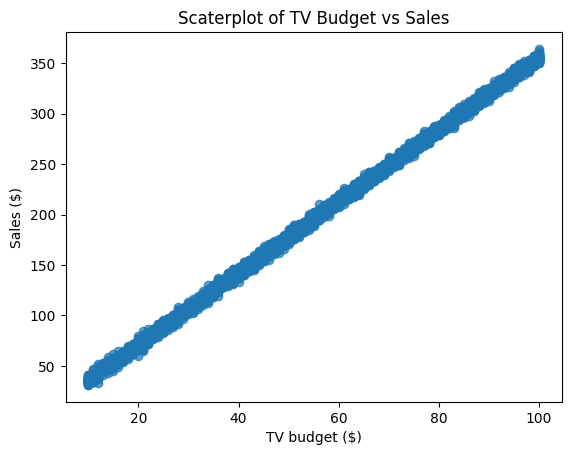

In [12]:
# Create a scatterplot comparing X and Sales (Y).
plt.scatter(data_clean['TV'], data_clean['Sales'], alpha=0.7)
plt.title('Scaterplot of TV Budget vs Sales')
plt.xlabel('TV budget ($)')
plt.ylabel('Sales ($)')
plt.show()

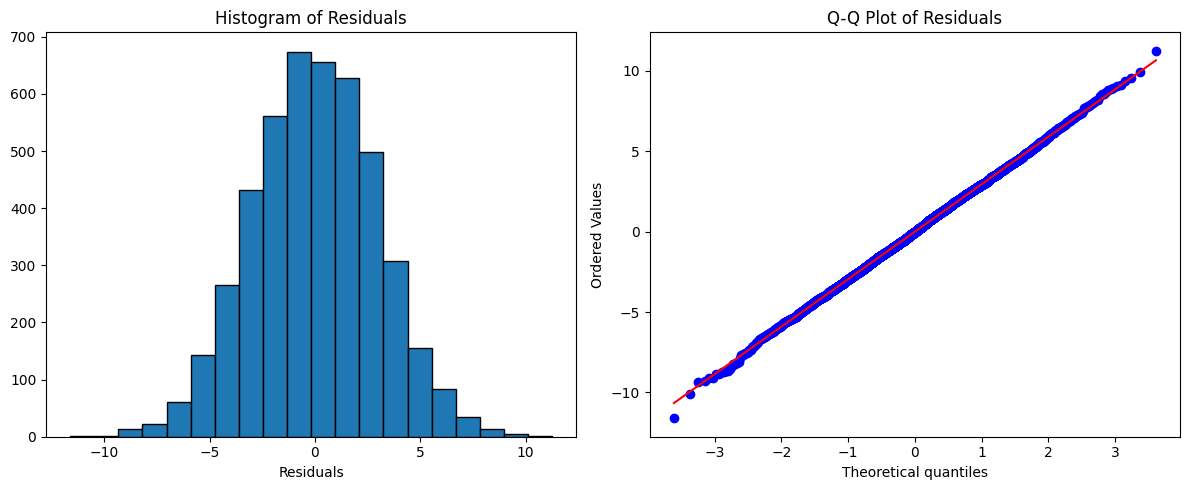

In [13]:
import scipy.stats as stats

# Calculate the residuals (Actual - Predicted)
residuals = results.resid

# Create a 1x2 plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of residuals
axes[0].hist(residuals, bins=20, edgecolor='black')
axes[0].set_xlabel('Residuals')
axes[0].set_title('Histogram of Residuals')

# Q-Q plot of residuals
stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot of Residuals')

# Clean up spacing
plt.tight_layout()

# Show the plot
plt.show()


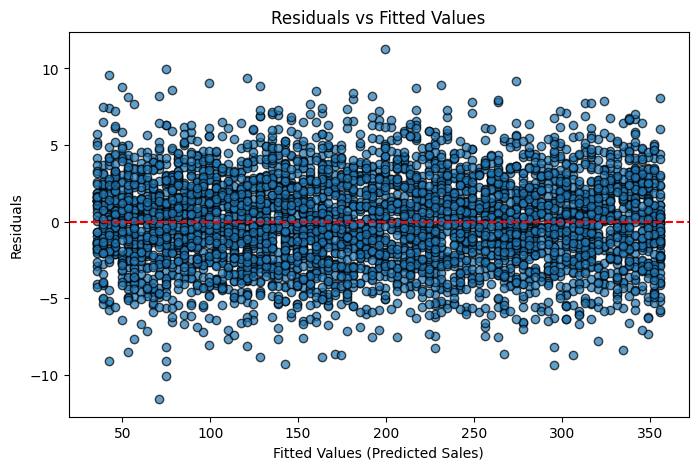

In [14]:
# Get fitted (predicted) values from the model
fitted_values = results.fittedvalues
residuals = results.resid

# Create the scatterplot
plt.figure(figsize=(8, 5))
plt.scatter(fitted_values, residuals, alpha=0.7, edgecolor='k')

# Set axis labels and title
plt.xlabel('Fitted Values (Predicted Sales)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

# Add horizontal line at y = 0
plt.axhline(y=0, color='red', linestyle='--')

# Show the plot
plt.show()
